In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data from csv file in my daysofcode folder using ../ instead of writing all the paths
df = pd.read_csv('./inspection_scores2017.csv')
#check the first 5 rows of the dataset
df.head()
#check the last 5 rows of the dataset
df.tail()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
8983,Graceland Grocery,78736,01/03/2017,97,"8600 W US 290 HWY\nAUSTIN, TX 78736\n(30.23447...",11444903,Routine Inspection
8984,House Park Bar-B-Que,78703,01/03/2017,85,"900 W 12TH ST\nAUSTIN, TX 78703\n(30.276593, -...",2800400,Routine Inspection
8985,Sa-Ten,78702,01/03/2017,93,"916 SPRINGDALE RD Bunit 101\nAUSTIN, TX 78702\...",11202021,Routine Inspection
8986,Amy's Ice Cream,78748,01/03/2017,95,"9600 S IH 35 SVRD SB Bunit 400\nAUSTIN, TX 787...",10014585,Routine Inspection
8987,Starbuck's Coffee#6203,78759,01/03/2017,99,"9722 GREAT HILLS TRL\nAUSTIN, TX 78759\n(30.39...",2800798,Routine Inspection


In [3]:
#check the data type of each column
df.dtypes

Restaurant Name        object
Zip Code               object
Inspection Date        object
Score                   int64
Address                object
Facility ID             int64
Process Description    object
dtype: object

In [4]:
#drop "Facitily ID, Process Description" column as unnescessary info
df.drop(['Facility ID', 'Process Description'], axis=1, inplace=True)
df.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address
0,MN - Manor Grocery,78653,12/29/2017,93,"102 E PARSONS ST\nMANOR, TX 78653\n(30.341012,..."
1,LW - Grumpy Grouper,78734,12/29/2017,83,"1113 N FM 620 RD\nLAKEWAY, TX 78734\n"
2,Hotel Saint Cecilia,78704,12/29/2017,98,"112 ACADEMY DR\nAUSTIN, TX 78704\n(30.251818, ..."
3,Las Mangonadas,78702,12/29/2017,92,"1144 AIRPORT BLVD Unit 180\nAUSTIN, TX 78702\n..."
4,MN - Walmart # 3169 Fuel Center,78653,12/29/2017,99,"11821 E US 290 HWY EB\nMANOR, TX 78653\n"


In [5]:
#rename all columns 
#df.columns =['DBA_name', 'Zip_code', 'Inspection_date', 'Scores', 'Address']
#rename some columns
df.rename(columns={'Restaurant Name': 'DBA_name', 'Zip Code': 'Zip_code', 'Inspection Date': 'Inspection_date'},inplace=True)

In [6]:
df.head()

,DBA_name,Zip_code,Inspection_date,Score,Address
0,MN - Manor Grocery,78653,12/29/2017,93,"102 E PARSONS ST\nMANOR, TX 78653\n(30.341012,..."
1,LW - Grumpy Grouper,78734,12/29/2017,83,"1113 N FM 620 RD\nLAKEWAY, TX 78734\n"
2,Hotel Saint Cecilia,78704,12/29/2017,98,"112 ACADEMY DR\nAUSTIN, TX 78704\n(30.251818, ..."
3,Las Mangonadas,78702,12/29/2017,92,"1144 AIRPORT BLVD Unit 180\nAUSTIN, TX 78702\n..."
4,MN - Walmart # 3169 Fuel Center,78653,12/29/2017,99,"11821 E US 290 HWY EB\nMANOR, TX 78653\n"


In [7]:
#to get distribution of values
df.Zip_code.value_counts()

78701                          595
78704                          586
78745                          503
78758                          470
78753                          454
78702                          415
78759                          392
78705                          371
78757                          342
78741                          284
78723                          266
78746                          265
78744                          264
78748                          252
78749                          247
78703                          198
78752                          194
78738                          179
78729                          174
78727                          172
78751                          168
78734                          165
78750                          161
78756                          142
78653                          135
78660                          128
78731                          120
78717                          119
78735               

In [8]:
#there are some rows that contained wrong zipcode info
#replace bad zip code with the correct one
df['Zip_code'].replace(to_replace=['Hwy 290 E\nAustin TX  78723'], value='78723', inplace=True)

In [9]:
df['Zip_code'].replace(to_replace=['6\nAustin, TX  78741'], value='78741', inplace=True)

In [10]:
df['Zip_code'].replace(to_replace=['as 78653'], value='78753', inplace=True)

In [11]:
df['Zip_code'].replace(to_replace=['as 78669'], value='78669', inplace=True)

In [12]:
#now all zip codes are correct
df.Zip_code.value_counts()

78701    595
78704    586
78745    503
78758    470
78753    457
78702    415
78759    392
78705    371
78757    342
78741    286
78723    268
78746    265
78744    264
78748    252
78749    247
78703    198
78752    194
78738    179
78729    174
78727    172
78751    168
78734    165
78750    161
78756    142
78653    135
78660    128
78731    120
78717    119
78735    118
78617    112
78722    103
78754    102
78728    101
78726    100
78732     79
78613     71
78724     69
78719     56
78721     51
78669     48
78747     31
78736     30
78725     28
78737     27
78730     26
78652     17
78739     12
78733     12
78641      8
78742      6
78620      4
78654      3
78615      2
78621      2
78610      2
Name: Zip_code, dtype: int64

In [13]:
#change "object" type in Zip_code to "numeric"
df['Zip_code']=pd.to_numeric(df['Zip_code'])
print(df.dtypes)

DBA_name           object
Zip_code            int64
Inspection_date    object
Score               int64
Address            object
dtype: object


In [14]:
#change "object" type in Inspection date to "datetime"
df['Inspection_date']=pd.to_datetime(df['Inspection_date'])
print(df.dtypes)

DBA_name                   object
Zip_code                    int64
Inspection_date    datetime64[ns]
Score                       int64
Address                    object
dtype: object


In [15]:
df.head()

,DBA_name,Zip_code,Inspection_date,Score,Address
0,MN - Manor Grocery,78653,2017-12-29,93,"102 E PARSONS ST\nMANOR, TX 78653\n(30.341012,..."
1,LW - Grumpy Grouper,78734,2017-12-29,83,"1113 N FM 620 RD\nLAKEWAY, TX 78734\n"
2,Hotel Saint Cecilia,78704,2017-12-29,98,"112 ACADEMY DR\nAUSTIN, TX 78704\n(30.251818, ..."
3,Las Mangonadas,78702,2017-12-29,92,"1144 AIRPORT BLVD Unit 180\nAUSTIN, TX 78702\n..."
4,MN - Walmart # 3169 Fuel Center,78653,2017-12-29,99,"11821 E US 290 HWY EB\nMANOR, TX 78653\n"


In [16]:
# Print the shape of df
print(df.shape)

(8988, 5)


In [17]:
# Print the info of df
df.isnull().sum()

DBA_name           0
Zip_code           0
Inspection_date    0
Score              0
Address            0
dtype: int64

In [18]:
df.groupby('Zip_code').groups.keys()

dict_keys([78610, 78613, 78615, 78617, 78620, 78621, 78641, 78652, 78653, 78654, 78660, 78669, 78701, 78702, 78703, 78704, 78705, 78717, 78719, 78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730, 78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739, 78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759])

In [19]:
df1=df
df1.head()

,DBA_name,Zip_code,Inspection_date,Score,Address
0,MN - Manor Grocery,78653,2017-12-29,93,"102 E PARSONS ST\nMANOR, TX 78653\n(30.341012,..."
1,LW - Grumpy Grouper,78734,2017-12-29,83,"1113 N FM 620 RD\nLAKEWAY, TX 78734\n"
2,Hotel Saint Cecilia,78704,2017-12-29,98,"112 ACADEMY DR\nAUSTIN, TX 78704\n(30.251818, ..."
3,Las Mangonadas,78702,2017-12-29,92,"1144 AIRPORT BLVD Unit 180\nAUSTIN, TX 78702\n..."
4,MN - Walmart # 3169 Fuel Center,78653,2017-12-29,99,"11821 E US 290 HWY EB\nMANOR, TX 78653\n"


In [20]:
#find the DBA_name that score higher than 85
df1.Zip_code.value_counts()

78701    595
78704    586
78745    503
78758    470
78753    457
78702    415
78759    392
78705    371
78757    342
78741    286
78723    268
78746    265
78744    264
78748    252
78749    247
78703    198
78752    194
78738    179
78729    174
78727    172
78751    168
78734    165
78750    161
78756    142
78653    135
78660    128
78731    120
78717    119
78735    118
78617    112
78722    103
78754    102
78728    101
78726    100
78732     79
78613     71
78724     69
78719     56
78721     51
78669     48
78747     31
78736     30
78725     28
78737     27
78730     26
78652     17
78733     12
78739     12
78641      8
78742      6
78620      4
78654      3
78621      2
78615      2
78610      2
Name: Zip_code, dtype: int64

In [21]:
#location that has the most food establishment
popular_area = df1.Zip_code.value_counts().head(20)
print(popular_area)

78701    595
78704    586
78745    503
78758    470
78753    457
78702    415
78759    392
78705    371
78757    342
78741    286
78723    268
78746    265
78744    264
78748    252
78749    247
78703    198
78752    194
78738    179
78729    174
78727    172
Name: Zip_code, dtype: int64


In [22]:
%matplotlib inline
import seaborn as sns

In [23]:
x = df1.Zip_code.value_counts().head(20)
y = df1.Zip_code

In [24]:
df_top20 = pd.DataFrame(df1.groupby('Zip_code').count()['Address'].sort_values(ascending=False)[:20])

In [25]:
# make a cont column
df_top20.reset_index(inplace=True)

In [26]:
# rename zip and address cols
df_top20.columns = ['zip', 'count']

In [27]:
# df_top20

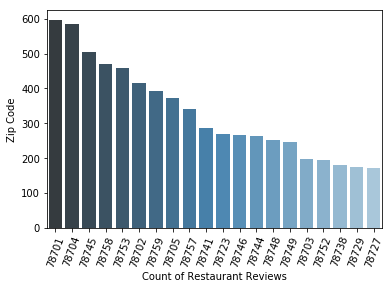

In [36]:
zp = sns.barplot(y='count', x='zip', data=df_top20, palette='Blues_d', order=df_top20['zip'])

# g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
zp.set_xticklabels(df_top20['zip'], rotation=70)
zp.set(xlabel='Count of Restaurant Reviews', ylabel='Zip Code')
plt.show()